In [1]:
# import necessary libaries
import matplotlib.pyplot as plt
import pandas as pd
import respy as rp
import yaml
import seaborn as sns
import numpy as np
from auxiliary.auxiliary import 

from pathlib import Path
from time import time

Now we want to add another covariate. As before we concentrate on a simple example, but this can be extended in any direction. The simplest covariate is the constant. We also had before the covariate not fishing last period. We saw in the examples above.

A covariate in respy allows to specify advanced return structures to each choice. First, we need to define the covariate in the option file. In a second step, we specify the return for the choice for this covariate.

In [17]:
options = yaml.safe_load(open("option_files/options_age.yml"))
options

{'n_periods': 10,
 'simulation_agents': 1000,
 'simulation_seed': 132,
 'covariates': {'constant': '1',
  'not_fishing_last_period': "lagged_choice_1 != 'fishing'",
  'age': 'period + 16'}}

In [18]:
params = pd.read_csv("params_files/robinson_crusoe_age.csv", index_col=["category", "name"])
params

value
category                name                          
delta                   delta                     0.95
wage_fishing            exp_fishing               0.15
                        age                      -0.01
nonpec_fishing          constant                 -1.00
nonpec_hammock          constant                  2.50
                        not_fishing_last_period  -1.00
shocks_sdcorr           sd_fishing                0.50
                        sd_hammock                0.50
                        corr_hammock_fishing      0.00
lagged_choice_1_hammock constant                  1.00

In [19]:
simulate = rp.get_simulate_func(params, options)
df = simulate(params)

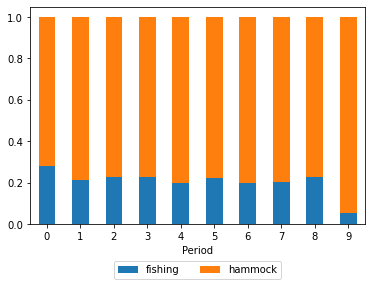

In [20]:
fig, ax = plt.subplots()

df.groupby("Period").Choice.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, ax=ax
)

plt.xticks(rotation="horizontal")

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.275), ncol=2)

plt.show()
plt.close()